In [4]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

import visuals as vs

%matplotlib inline

data = pd.read_csv("census.csv")

data.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [5]:
n_records = data.shape[0]

n_greater_50k = data[data['income'] == '>50K'].shape[0]

n_at_most_50k = data[data['income'] == '<=50K'].shape[0]

greater_percent = n_greater_50k * 100 / (n_records + 0.0)

print n_records, n_greater_50k, n_at_most_50k, greater_percent

45222 11208 34014 24.7843969749


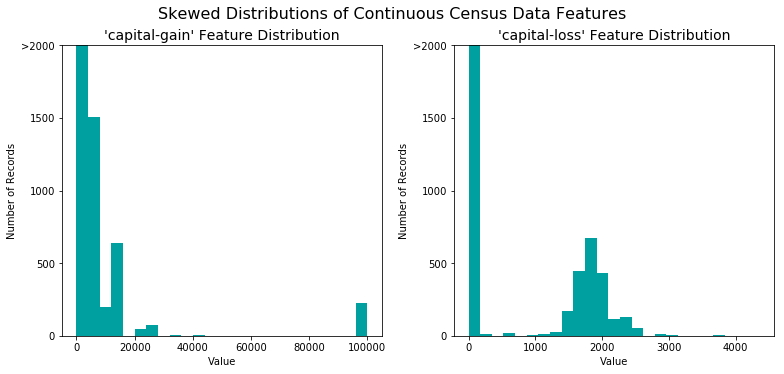

In [6]:
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

vs.distribution(data)

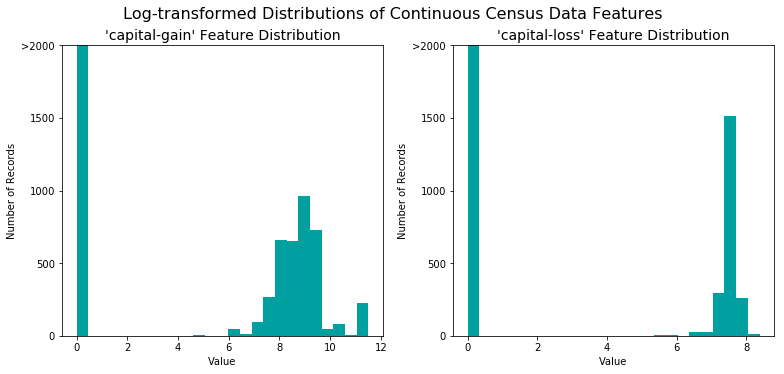

In [7]:
# 对于高度倾斜分布的特征使用Log转换
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# 可视化经过log之后的数据分布
vs.distribution(features_raw, transformed = True)

In [8]:
from sklearn.preprocessing import MinMaxScaler

# 数据归一化 Min-Max
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])
features_raw.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


In [9]:
# 特征编码
features = pd.get_dummies(features_raw)
income = income_raw.apply(lambda x : 0 if x == '<=50K' else 1)

accuracy = income.sum() / float(income.shape[0])
fscore = 1.25 * accuracy * 1 / ((0.25 * accuracy) + 1)
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


In [10]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)


print X_train.shape[0]
print X_test.shape[0]

36177
9045


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    
    results = {}

    start = time() 
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    results['train_time'] = end - start
    
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = None
    end = time()
    results['pred_time'] = end - start
    
    start = time()
    predictions_train = learner.predict(X_train[:300])
    end = time()                                              
    results['test_time'] = start - end
            
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    return results

DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


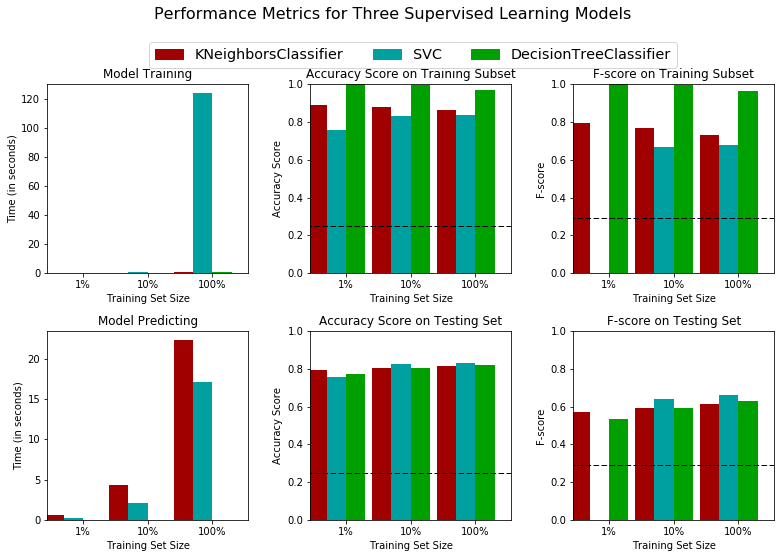

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

clf_A = DecisionTreeClassifier(random_state = 0)
clf_B = svm.SVC(random_state = 1)
clf_C = KNeighborsClassifier(n_neighbors=3)

samples_1 = y_train.shape[0] / 100
samples_10 = y_train.shape[0] / 10
samples_100 = y_train.shape[0]

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

vs.evaluate(results, accuracy, fscore)

In [13]:
from sklearn import grid_search
from sklearn.metrics import make_scorer

clf = DecisionTreeClassifier(random_state = 0)
parameters = {'max_depth' : [3,4,5,6,7,8,9,10], 'min_samples_split' : [3,4,5,6,7,8,9,10]}
scorer = make_scorer(fbeta_score, beta = 0.5)

grid_obj = grid_search.GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)

grid_obj.fit(X_train, y_train)

best_clf = grid_obj.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8187
F-score on testing data: 0.6282

Optimized Model
------
Final accuracy score on the testing data: 0.8525
Final F-score on the testing data: 0.7226


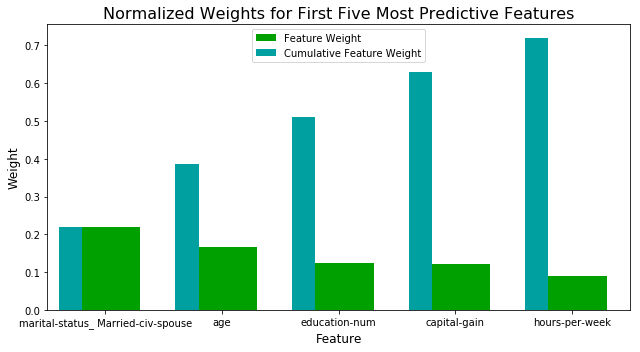

In [14]:
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

importances = model.feature_importances_

vs.feature_plot(importances, X_train, y_train)

In [15]:
from sklearn.base import clone

X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]


start = time()
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
end = time()
time_full = end - start

start = time()
reduced_predictions = clf.predict(X_test_reduced)
end = time()
time_reduced = end - start

print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))
print time_full, time_reduced

Final Model trained on full data
------
Accuracy on testing data: 0.8525
F-score on testing data: 0.7226

Final Model trained on reduced data
------
Accuracy on testing data: 0.8426
F-score on testing data: 0.6801
0.032457113266 0.00129199028015
